In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
data= pd.read_csv("../turning_patterns_into_profits/Data/Transactions_all_data.csv")

data.head()

,transaction_id,cust_id,DOB,Gender,city_code,tran_date,prod_subcat,prod_subcat_code,prod_cat,prod_cat_code,...,Rate,Tax,total_amt,Store_type,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,80712190438,270351,09/26/81,M,5,2/28/2014,Women,1,Clothing,1,...,-772,405.300,-4265.300,e-Shop,NaN,NaN,NaN,NaN,NaN,NaN
1,29258453508,270384,11/05/73,F,8,2/27/2014,Computers,5,Electronics,3,...,-1497,785.925,-8270.925,e-Shop,NaN,NaN,NaN,NaN,NaN,NaN
2,51750724947,273420,07/27/92,M,8,2/24/2014,DIY,6,Books,5,...,-791,166.110,-1748.110,TeleShop,NaN,NaN,NaN,NaN,NaN,NaN
3,93274880719,271509,08/06/81,M,3,2/24/2014,Children,11,Home and kitchen,6,...,-1363,429.345,-4518.345,e-Shop,NaN,NaN,NaN,NaN,NaN,NaN
4,51750724947,273420,07/27/92,M,8,2/23/2014,DIY,6,Books,5,...,-791,166.110,-1748.110,TeleShop,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
data.drop(["Unnamed: 15", "Unnamed: 16", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20"], axis=1, inplace=True)

In [33]:
import datetime

month_list=[]
year_list=[]
mo_yr_list=[]

for each_date in data['tran_date']:
    date= datetime.datetime.strptime(str(each_date), "%m/%d/%Y")
    month_list.append(date.month)
    year_list.append(date.year)
    mo_yr_list.append(f"{date.month}/{date.year}")

In [34]:
data["transaction_month"] = month_list
data["transaction_year"] = year_list
data["transaction_MoYr"] = mo_yr_list

data.head()

,transaction_id,cust_id,DOB,Gender,city_code,tran_date,prod_subcat,prod_subcat_code,prod_cat,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,transaction_month,transaction_year,transaction_MoYr
0,80712190438,270351,09/26/81,M,5,2/28/2014,Women,1,Clothing,1,-5,-772,405.300,-4265.300,e-Shop,2,2014,2/2014
1,29258453508,270384,11/05/73,F,8,2/27/2014,Computers,5,Electronics,3,-5,-1497,785.925,-8270.925,e-Shop,2,2014,2/2014
2,51750724947,273420,07/27/92,M,8,2/24/2014,DIY,6,Books,5,-2,-791,166.110,-1748.110,TeleShop,2,2014,2/2014
3,93274880719,271509,08/06/81,M,3,2/24/2014,Children,11,Home and kitchen,6,-3,-1363,429.345,-4518.345,e-Shop,2,2014,2/2014
4,51750724947,273420,07/27/92,M,8,2/23/2014,DIY,6,Books,5,-2,-791,166.110,-1748.110,TeleShop,2,2014,2/2014


In [35]:
data1=data.loc[data['transaction_month']==1]
data1=data1.groupby(['transaction_year']).sum()
data1= data1.reset_index()
data1

,transaction_year,transaction_id,cust_id,city_code,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,transaction_month
0,2011,6955656991362,38207491,826,977,570,392,107566,34484.310,337307.880,141
1,2012,29004598917948,162677204,3274,3776,2247,1444,376499,142572.360,1207435.710,600
2,2013,30174687094233,165346418,3411,3583,2205,1542,419248,158249.070,1378639.990,610
3,2014,33875526310293,184890241,3799,4096,2563,1683,440995,172305.525,1500564.585,682


In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
X= data1['transaction_year'].values.reshape(-1,1)
y=data1["total_amt"].values.reshape(-1,1)

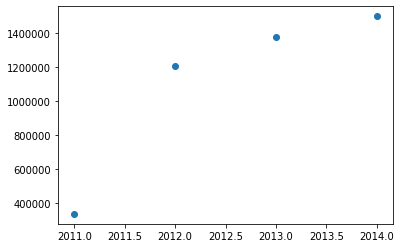

In [38]:
plt.scatter(X,y)

In [39]:
months=[1,2,3,4,5,6,7,8,9,10,11,12]

In [40]:
for each_month in months:
    new_df= data.loc[data['transaction_month']== each_month]
    grouped_df= new_df.groupby(['transaction_year']).sum()
    grouped_df=grouped_df.reset_index()
    
    X= grouped_df['transaction_year'].values.reshape(-1,1)
    y=grouped_df["total_amt"].values.reshape(-1,1)
    
    print(f"{each_month}/{X}")
    print(y)

1/[[2011]
 [2012]
 [2013]
 [2014]]
[[ 337307.88 ]
 [1207435.71 ]
 [1378639.99 ]
 [1500564.585]]
2/[[2011]
 [2012]
 [2013]
 [2014]]
[[1087283.535]
 [1306702.28 ]
 [1194731.525]
 [ 735078.045]]
3/[[2011]
 [2012]
 [2013]]
[[1376537.175]
 [1440357.555]
 [1465626.695]]
4/[[2011]
 [2012]
 [2013]]
[[1379838.915]
 [1212981.705]
 [1276018.64 ]]
5/[[2011]
 [2012]
 [2013]]
[[1174157.53]
 [1351045.93]
 [1286049.83]]
6/[[2011]
 [2012]
 [2013]]
[[1221299.04 ]
 [1295998.145]
 [1254308.705]]
7/[[2011]
 [2012]
 [2013]]
[[1309300.135]
 [1246654.37 ]
 [1222970.905]]
8/[[2011]
 [2012]
 [2013]]
[[1230637.395]
 [1321288.28 ]
 [1397714.5  ]]
9/[[2011]
 [2012]
 [2013]]
[[1437136.48 ]
 [1317662.775]
 [1337621.285]]
10/[[2011]
 [2012]
 [2013]]
[[1399860.41 ]
 [1408005.365]
 [1368587.805]]
11/[[2011]
 [2012]
 [2013]]
[[1450866.105]
 [1378302.965]
 [1269408.53 ]]
12/[[2011]
 [2012]
 [2013]]
[[1327391.195]
 [1417278.525]
 [1257120.93 ]]


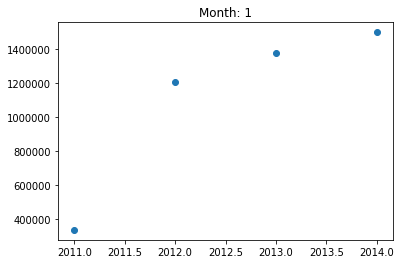

0.8062371172992567


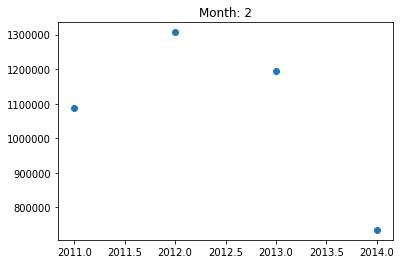

0.3719392346101348


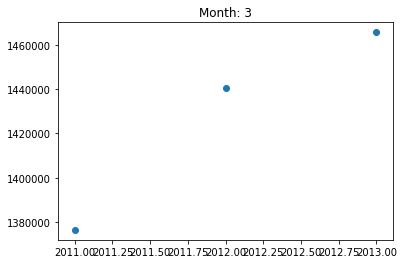

0.9412500854566979


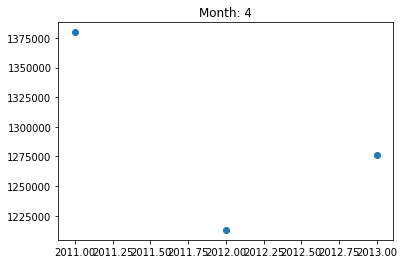

0.3795866432450473


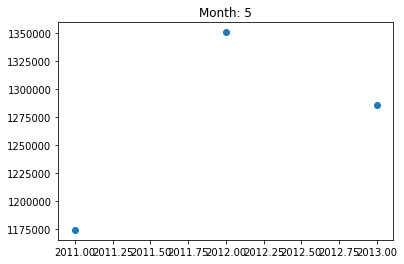

0.3909704546938463


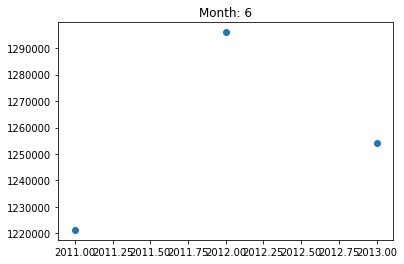

0.19440223844682414


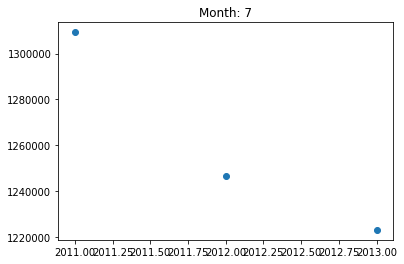

0.9364196792332128


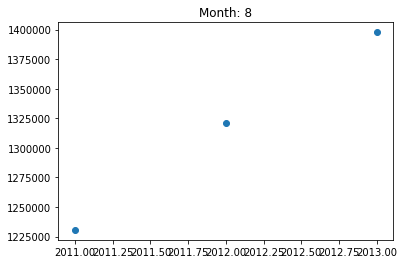

0.997589645671918


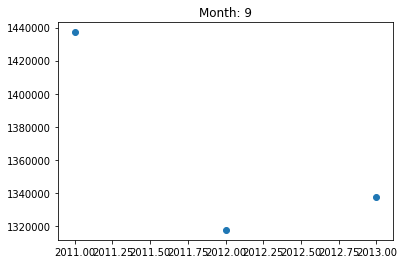

0.6044581506171789


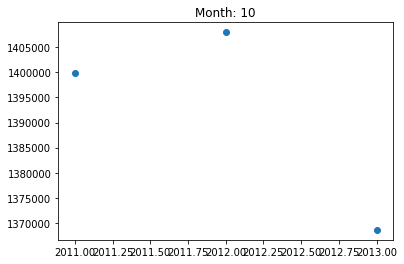

0.5646380951640297


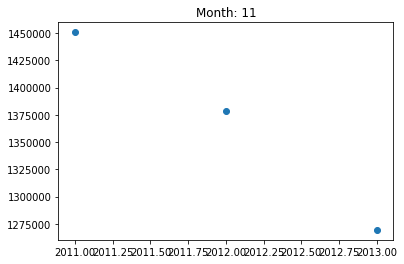

0.9868136246604242


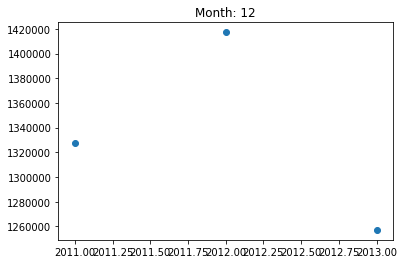

0.1915497709644088


In [41]:
for each_month in months:
    new_df= data.loc[data['transaction_month']== each_month]
    grouped_df= new_df.groupby(['transaction_year']).sum()
    grouped_df=grouped_df.reset_index()
    
    X= grouped_df['transaction_year'].values.reshape(-1,1)
    y=grouped_df["total_amt"].values.reshape(-1,1)
    
    plt.scatter(X,y)
    plt.title(f"Month: {each_month}")
    plt.show()
    
    model=LinearRegression()
    model.fit(X,y)
    print(model.score(X,y))

In [ ]:
## Some months observe a linear trend that may be useful for forecasting, but other months
## are not linear at all. Maybe there is more predictability if we look at categorical sales by month or sales by store type.